In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
def COV_calc(Ds_column, Mn_column, df_lroi):
    Ds = []
    Mean = []
    COV = []
    for i in range(len(df_lroi[f"{Ds_column}"])):
        Ds.append(df_lroi[f"{Ds_column}"][i])
        Mean.append(df_lroi[f"{Mn_column}"][i])
    for i in range(len(Mean)):
        COV.append(Ds[i]/Mean[i]*100)
        
    return COV

### Importing data

In [3]:
df = pd.read_excel("VOI.xlsx")
df=df.drop([34,35,36,37,38,39])
# delete parts of the excel tables that are not needed for the analyses

### Select the right data for the analysis

In [4]:
df1 = df[["RK_1st_reader_vol","MK_1st_read_vol","AK_1stl_read_vol","FA_1st_read_vol","ADC_1st_read_vol"]]
Fact=df["Histology_1_2_3"]
X=df1.values
Y=Fact.values.ravel()

### COV ANALYSIS

In [5]:
df_lroi = pd.read_excel("spreadsheet_supplementary_large_ROIs.xls")
df_sroi = pd.read_excel("spreadsheet_supplementary_small_ROIs.xls").drop([34,35])
df_voi = pd.read_excel("VOI_spreadsheet.xlsx")

## LARGE ROI ANALYSIS


In [6]:
df_trial = pd.DataFrame()

df_trial["COV_MK"] = COV_calc('DS_MK', 'MEAN_MK', df_lroi)
df_trial["COV_AK"] = COV_calc('DS_AK', 'MEAN_AK', df_lroi)
df_trial["COV_FA"] = COV_calc('DS_FA', 'MEAN_FA', df_lroi)
df_trial["COV_ADC"] = COV_calc('DS_ADC', 'MEAN_ADC', df_lroi)
df_trial["COV_RK"] = COV_calc('DS_RK', 'MEAN_RK', df_lroi)

ls_mean_cov_LROI = []

ls_mean_cov_LROI.append(df_trial["COV_MK"].mean())
ls_mean_cov_LROI.append(df_trial["COV_AK"].mean())
ls_mean_cov_LROI.append(df_trial["COV_FA"].mean())
ls_mean_cov_LROI.append(df_trial["COV_ADC"].mean())
ls_mean_cov_LROI.append(df_trial["COV_RK"].mean())

ls_mean_cov_LROI 


[4.864068289803557,
 4.087430817227428,
 10.19441709761301,
 6.272206328475234,
 12.962447374989257]

## SMALL ROI ANALYSIS

In [7]:
df_trial = pd.DataFrame()
df_trial["COV_MK"] = COV_calc('DS_MK', 'MEAN_MK', df_sroi)
df_trial["COV_AK"] = COV_calc('DS_AK', 'MEAN_AK', df_sroi)
df_trial["COV_FA"] = COV_calc('DS_FA', 'MEAN_FA', df_sroi)
df_trial["COV_ADC"] = COV_calc('DS_ADC', 'MEAN_ADC', df_sroi)
df_trial["COV_RK"] = COV_calc('DS_RK', 'MEAN_RK', df_sroi)

ls_mean_cov_SROI = []

ls_mean_cov_SROI.append(df_trial["COV_MK"].mean())
ls_mean_cov_SROI.append(df_trial["COV_AK"].mean())
ls_mean_cov_SROI.append(df_trial["COV_FA"].mean())
ls_mean_cov_SROI.append(df_trial["COV_ADC"].mean())
ls_mean_cov_SROI.append(df_trial["COV_RK"].mean())

ls_mean_cov_SROI

[9.364614486088172,
 10.2366715324751,
 19.300997440521584,
 9.802322943702595,
 13.840725600768732]

## VOI ANALYSIS

In [8]:
df_trial = pd.DataFrame()
df_trial["COV_MK"] = COV_calc('DS_MK', 'MEAN_MK', df_voi)
df_trial["COV_AK"] = COV_calc('DS_AK', 'MEAN_AK', df_voi)
df_trial["COV_FA"] = COV_calc('DS_FA', 'MEAN_FA', df_voi)
df_trial["COV_ADC"] = COV_calc('DS_ADC', 'MEAN_ADC', df_voi)
df_trial["COV_RK"] = COV_calc('DS_RK', 'MEAN_RK', df_voi)

ls_mean_cov_VOI = []

ls_mean_cov_VOI.append(df_trial["COV_MK"].mean())
ls_mean_cov_VOI.append(df_trial["COV_AK"].mean())
ls_mean_cov_VOI.append(df_trial["COV_FA"].mean())
ls_mean_cov_VOI.append(df_trial["COV_ADC"].mean())
ls_mean_cov_VOI.append(df_trial["COV_RK"].mean())

ls_mean_cov_VOI

[3.5297651869744877,
 3.0232993046097025,
 6.740674341279181,
 3.9168948614016443,
 9.704760030356391]

## Graphical Analysis BoxPlot

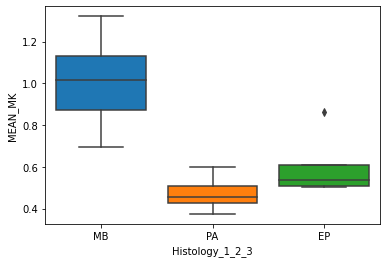

In [9]:
labels = ["MB", "PA","EP"]

ax = sns.boxplot(x='Histology_1_2_3', y='MEAN_MK', data=df,saturation=1)
ax.set_xticklabels(labels)

plt.savefig("MK_Boxplot.jpeg", dpi=300)

# Show the plot
plt.show()

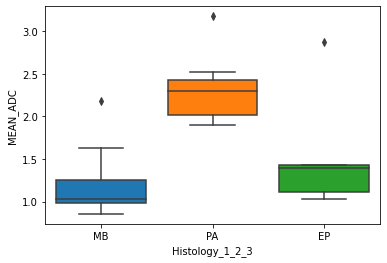

In [10]:
ax = sns.boxplot(x='Histology_1_2_3', y='MEAN_ADC', data=df,saturation=1)
ax.set_xticklabels(labels)

plt.savefig("ADC_Boxplot.jpeg", dpi=300)

# Show the plot
plt.show()

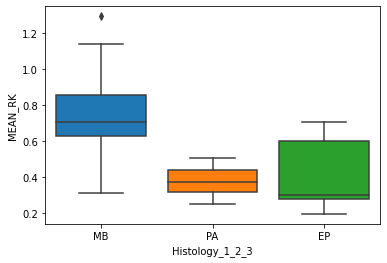

In [11]:
ax = sns.boxplot(x='Histology_1_2_3', y='MEAN_RK', data=df,saturation=1)
ax.set_xticklabels(labels)

plt.savefig("RK_Boxplot.jpeg", dpi=300)

# Show the plot
plt.show()

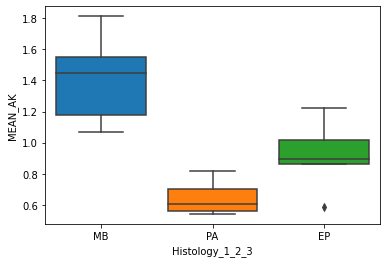

In [12]:
ax = sns.boxplot(x='Histology_1_2_3', y='MEAN_AK', data=df,saturation=1)
ax.set_xticklabels(labels)

plt.savefig("AK_Boxplot.jpeg", dpi=300)

# Show the plot
plt.show()

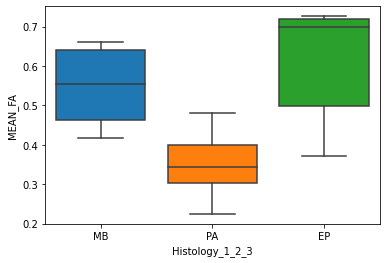

In [13]:
ax = sns.boxplot(x='Histology_1_2_3', y='MEAN_FA', data=df,saturation=1)
ax.set_xticklabels(labels)

plt.savefig("FA_Boxplot.jpeg", dpi=300)

# Show the plot
plt.show()

## COV Measurments

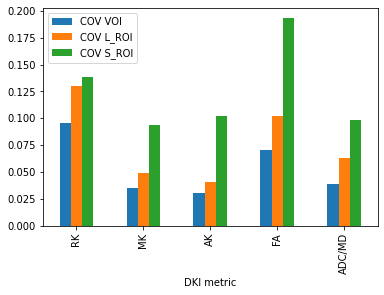

In [14]:
df_1 = pd.read_excel("COV_Measurements.xlsx")
df_1.plot(x="DKI metric", y=["COV VOI", "COV L_ROI", "COV S_ROI"], kind="bar")
plt.savefig("cov.tiff", dpi=300)

## MANOVA ANALYSIS

In [15]:
from statsmodels.multivariate.manova import MANOVA

model = MANOVA.from_formula('MEAN_MK + MEAN_AK + MEAN_FA + MEAN_ADC + MEAN_RK ~ Histology_1_2_3', data=df)
result = model.mv_test()

result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Multivariate linear model
==============================================================
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0259 5.0000 28.0000 210.2604 0.0000
         Pillai's trace  0.9741 5.0000 28.0000 210.2604 0.0000
 Hotelling-Lawley trace 37.5465 5.0000 28.0000 210.2604 0.0000
    Roy's greatest root 37.5465 5.0000 28.0000 210.2604 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
      Histology_1_2_3     Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.3548 5.0000 28.0000 10.1853 0.0000
           Pillai's trace 0.6452 5.0000 28.0000 10.1853 0.0000
   Hotelling-Lawley trace 1.8188 5.0000 28.0000 10.1853 0.0000
      Roy's greatest root 1.8188 5.0000 28.0000 10.1853 0.0000
==============================================================

"""

## Apply SMOTE

In [16]:
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=3, random_state=4242)
X_SMOTE , Y_SMOTE = oversample.fit_resample(X, Y)

## Classification using the SMOTE dataset

Accuracy: 0.9285714285714286


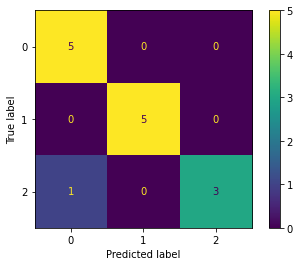

In [17]:

X_SMOTE_train, X_SMOTE_test, Y_SMOTE_train, Y_SMOTE_test= train_test_split(X_SMOTE,Y_SMOTE,test_size=0.3,random_state=4242)


clf=RandomForestClassifier(n_estimators=500, max_depth=2,min_samples_split=3,random_state=4142)
clf.fit(X_SMOTE_train,Y_SMOTE_train)
Y_pred=clf.predict(X_SMOTE_test)
print("Accuracy:",metrics.accuracy_score(Y_SMOTE_test, Y_pred))


from sklearn.metrics import confusion_matrix
nn=confusion_matrix( Y_SMOTE_test, Y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(nn).plot()
plt.savefig("SMOTE_CM_Grading.png",dpi=300)
plt.show()
from sklearn.metrics import plot_roc_curve

## Generation of the ROC Curve 

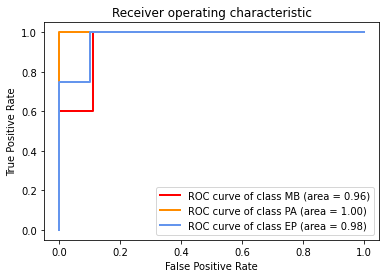

In [18]:
from sklearn.preprocessing import label_binarize


dict_subgroup = {0:"MB",1:"PA",2:"EP"}



y = label_binarize(Y_SMOTE_test, classes=[1, 2, 3])
n_classes = y.shape[1]


y_score = clf.fit(X_SMOTE_train, Y_SMOTE_train).predict_proba(X_SMOTE_test)


from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2
from itertools import cycle
colors = cycle(["red", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(dict_subgroup[i], roc_auc[i]),
    )
    
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("AUC_SMOTE_Grading.tiff",dpi=300)
plt.show()

## Confidence interval using Bootstrap

In [19]:
from sklearn.metrics import roc_auc_score
from math import sqrt

def roc_auc_ci(y_true, y_score, n_classes):
    for i in range (n_classes):
        AUC = roc_auc [i]
        N1 = sum(y_true == i)
        N2 = sum(y_true != i)
        Q1 = AUC / (2 - AUC)
        Q2 = 2*AUC**2 / (1 + AUC)
        SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
        lower = AUC - 1.96*SE_AUC
        upper = AUC + 1.96*SE_AUC
        if lower < 0:
            lower = 0
        if upper > 1:
            upper = 1
        return (lower, upper)

In [20]:
dict_subgroup = {0:"PA",1:"MB",2:"EP"}
#define the three classes in the analyses and then binarize them in order to obtain the bootstrapped scores

y = label_binarize(Y_SMOTE_test, classes=[1, 2, 3])
n_classes = y.shape[1]

n_bootstraps = 300
## generate three lists in which we will store the classifier performamce in every iteration
bootstrapped_scores_AP = []
bootstrapped_scores_MB = []
bootstrapped_scores_EP = []


In [21]:
import random
from random import randint 

for i in range (n_bootstraps):
    X_SMOTE_train, X_SMOTE_test, Y_SMOTE_train, Y_SMOTE_test= train_test_split(X_SMOTE,Y_SMOTE,test_size=0.5,random_state=randint(4200,4550))
    y = label_binarize(Y_SMOTE_test, classes=[1, 2, 3])
    n_classes = y.shape[1]
    clf=RandomForestClassifier(n_estimators=500, max_depth=2,min_samples_split=3,random_state=randint(0,500))
    y_score = clf.fit(X_SMOTE_train, Y_SMOTE_train).predict_proba(X_SMOTE_test)
    for i in range (n_classes):
            fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

            if i == 0:
                            score = roc_auc[i]
                            bootstrapped_scores_AP.append(score)

            elif i == 1:
                            score = roc_auc[i]
                            bootstrapped_scores_MB.append(score)

            elif i == 2:
                            score = roc_auc[i]
                            bootstrapped_scores_EP.append(score)


In [22]:
sorted_scores = np.array(bootstrapped_scores_EP)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower_EP = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper_EP = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower_EP, confidence_upper_EP))

Confidence interval for the score: [0.822 - 1.0]


In [23]:
sorted_scores = np.array(bootstrapped_scores_AP)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower_AP = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper_AP = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower_AP, confidence_upper_AP))

Confidence interval for the score: [0.955 - 1.0]


In [24]:
sorted_scores = np.array(bootstrapped_scores_MB)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower_MB = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper_MB = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower_MB, confidence_upper_MB))

Confidence interval for the score: [0.960 - 1.0]


## Classifier Performance Graphical Representation

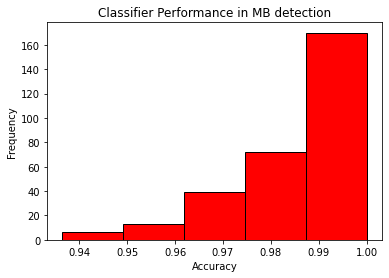

In [25]:
import matplotlib.pyplot as plt


# Create the histogram
plt.hist(bootstrapped_scores_MB, bins=5, alpha=1, color="red", edgecolor = "black")



# Add a title and labels
plt.title('Classifier Performance in MB detection')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

plt.savefig("PCLF_Medullo.jpeg", dpi=300)
# Show the plot
plt.show()


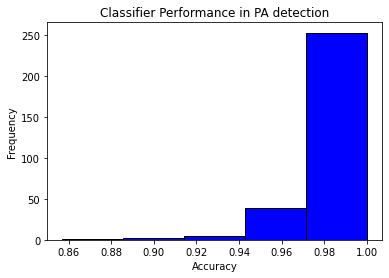

In [26]:
import matplotlib.pyplot as plt


# Create the histogram
plt.hist(bootstrapped_scores_AP, bins=5, alpha=1, color="blue", edgecolor = "black")



# Add a title and labels
plt.title('Classifier Performance in PA detection')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

plt.savefig("CLF_PA_bootstrap.jpeg", dpi=300)
# Show the plot
plt.show()


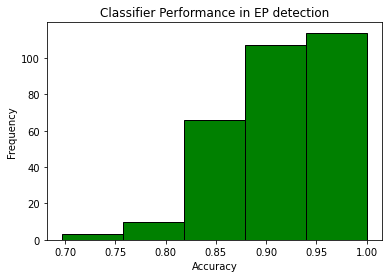

In [27]:
import matplotlib.pyplot as plt


# Create the histogram
plt.hist(bootstrapped_scores_EP, bins=5, alpha=1, color="green", edgecolor = "black")



# Add a title and labels
plt.title('Classifier Performance in EP detection')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.savefig("PCLF_EP.jpeg", dpi=300)
# Show the plot
plt.show()

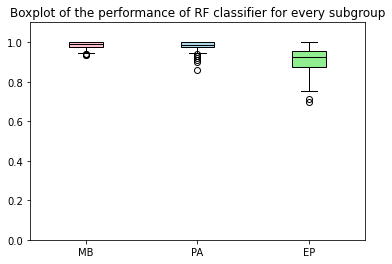

In [28]:
data = [bootstrapped_scores_MB, bootstrapped_scores_AP, bootstrapped_scores_EP]

labels = ["MB", "PA", "EP"]
edge_color = "black"
colors = ['pink', 'lightblue', 'lightgreen'] # set different colors for each label in order to have a better graphical view of the three boxplots

fig, ax = plt.subplots()

bp = ax.boxplot(data, patch_artist=True, labels=labels)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color=edge_color)
        
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
plt.ylim(0,1.1)
plt.title("Boxplot of the performance of RF classifier for every subgroup")
plt.savefig("Boxplot_nonzoom.jpeg", dpi=300)
plt.show()

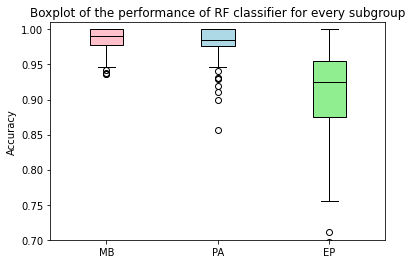

In [29]:
edge_color = "black"
colors = ['pink', 'lightblue', 'lightgreen'] # set different colors for each label in order to have a better graphical view of the three boxplots

fig, ax = plt.subplots()

bp = ax.boxplot(data, patch_artist=True, labels=labels)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color=edge_color)
        
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
plt.ylim(0.7,1.01)
plt.title("Boxplot of the performance of RF classifier for every subgroup")
plt.ylabel("Accuracy")
plt.savefig("boxplot_zoomed.jpeg", dpi=300)
plt.show()